# Problem Statement:: Use kNN to Predict the Age of Sea Slugs

In [37]:
import pandas as pd

url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(url)
abalone.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [38]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       4176 non-null   object 
 1   0.455   4176 non-null   float64
 2   0.365   4176 non-null   float64
 3   0.095   4176 non-null   float64
 4   0.514   4176 non-null   float64
 5   0.2245  4176 non-null   float64
 6   0.101   4176 non-null   float64
 7   0.15    4176 non-null   float64
 8   15      4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [39]:
abalone.columns

Index(['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15',
       '15'],
      dtype='object')

In [40]:
#Since sex is not a purely physical measure, you should remove it from the dataset. 

abalone = abalone.drop("M",axis=1)
abalone.head()

,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


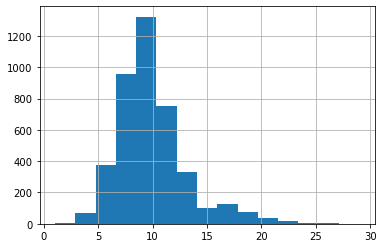

In [41]:
# The target variable of this exercise is Rings, so you can start with that. A histogram will give you a quick and useful
# overview of the age ranges that you can expect:


    
import matplotlib.pyplot as plt
abalone["15"].hist(bins=15)
plt.show()

# The histogram shows that most abalones in the dataset have between five and fifteen rings, but that it’s possible to get 
# up to twenty-five rings. The older abalones are underrepresented in this dataset. This seems intuitive, as age distributions 
# are generally skewed like this due to natural processes.

In [42]:
# A strong correlation between an independent variable and your goal variable would be a good sign, as this would confirm 
# that physical measurements and age are related.


# You can observe the complete correlation matrix in correlation_matrix. The most important correlations are the ones with
# the target variable Rings(15). You can get those correlations like this:

correlation_matrix = abalone.corr()
correlation_matrix["15"]

# Now look at the correlation coefficients for Rings with the other variables. The closer they are to 1, the more correlation 
# there is.


# >>> correlation_matrix = abalone.corr()
# >>> correlation_matrix["Rings"]
# Length            0.556720
# Diameter          0.574660
# Height            0.557467
# Whole weight      0.540390
# Shucked weight    0.420884
# Viscera weight    0.503819
# Shell weight      0.627574
# Rings             1.000000
# Name: Rings, dtype: float64

0.455     0.557123
0.365     0.575005
0.095     0.558109
0.514     0.540818
0.2245    0.421256
0.101     0.504274
0.15      0.628031
15        1.000000
Name: 15, dtype: float64

In [43]:
# To find the nearest neighbors in NumPy, go back to the Abalone Dataset. As you’ve seen, you need to define distances on 
# the vectors of the independent variables, so you should first get your pandas DataFrame into a NumPy array using the .values
# attribute:

X = abalone.drop("15", axis=1)
X = X.values
display(X)

y = abalone["15"]
y = y.values
display(y)


# This code block generates two objects that now contain your data: X and y. X is the independent variables and y is the 
#     dependent variable of your model. Note that you use a capital letter for X but a lowercase letter for y. This is often 
#     done in machine learning code because mathematical notation generally uses a capital letter for matrices and a lowercase 
#     letter for vectors.

array([[0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       [0.44  , 0.365 , 0.125 , ..., 0.2155, 0.114 , 0.155 ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

array([ 7,  9, 10, ...,  9, 10, 12], dtype=int64)

In [44]:
# Now you can apply a kNN with k = 3 on a new abalone

# You can create the NumPy array for this data point as follows:


new_data_point = np.array([0.569552,0.446407,0.154437,1.016849,0.439051,0.222526,0.291208])


<IPython.core.display.Javascript object>

In [45]:
# The next step is to compute the distances between this new data point and each of the data points in the Abalone Dataset 
# using the following code:

distances = np.linalg.norm(X - new_data_point, axis=1)
distances

<IPython.core.display.Javascript object>

array([0.9518455 , 0.40573594, 0.59618172, ..., 0.20397872, 0.14342627,
       1.10583307])

In [46]:
# You now have a vector of distances, and you need to find out which are the three closest neighbors. To do this, you need to 
# find the IDs of the minimum distances. You can use a method called .argsort() to sort the array from lowest to highest, and 
# you can take the first k elements to obtain the indices of the k nearest neighbors:

k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

# This tells you which three neighbors are closest to your new_data_point. In the next paragraph, you’ll see how to convert 
# those neighbors in an estimation.

array([4044, 1901, 1643], dtype=int64)

In [47]:
# Voting or Averaging of Multiple Neighbors:: Having identified the indices of the three nearest neighbors of your abalone of 
# unknown age, you now need to combine those neighbors into a prediction for your new data point.

# As a first step, you need to find the ground truths for those three neighbors:

nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings

# Now that you have the values for those three neighbors, you’ll combine them into a prediction for your new data point. 
# Combining the neighbors into a prediction works differently for regression and classification.

array([ 9, 11, 10], dtype=int64)

In [48]:
# Average for Regression:: In regression problems, the target variable is numeric. You combine multiple neighbors into one 
# prediction by taking the average of their values of the target variable. You can do this as follows:

prediction = nearest_neighbor_rings.mean()
prediction

# You’ll get a value of 10 for prediction. This means that the 3-Nearest Neighbor prediction for your new data point is 10. 
# You could do the same for any number of new abalones that you want.

10.0

# Fit kNN in Python Using scikit-learn

In [49]:
# While coding an algorithm from scratch is great for learning purposes, it’s usually not very practical when working on a 
# machine learning task. In this section, you’ll explore the implementation of the kNN algorithm used in scikit-learn, one of 
# the most comprehensive machine learning packages in Python.

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

display(X_train)
display(X_test)
display(y_train)
display(y_test)

# The test_size refers to the number of observations that you want to put in the training data and the test data. If you 
# specify a test_size of 0.2, your test_size will be 20 percent of the original data, therefore leaving the other 80 percent 
# as training data.

# The random_state is a parameter that allows you to obtain the same results every time the code is run. train_test_split() 
# makes a random split in the data, which is problematic for reproducing the results. Therefore, it’s common to use 
# random_state. The choice of value in random_state is arbitrary.

# In the above code, you separate the data into training and test data. This is needed for objective model evaluation. You 
# can now proceed to fit a kNN model on the training data using scikit-learn.

array([[0.48  , 0.37  , 0.12  , ..., 0.251 , 0.114 , 0.15  ],
       [0.53  , 0.41  , 0.165 , ..., 0.24  , 0.169 , 0.24  ],
       [0.5   , 0.39  , 0.13  , ..., 0.275 , 0.168 , 0.18  ],
       ...,
       [0.555 , 0.44  , 0.15  , ..., 0.4155, 0.146 , 0.23  ],
       [0.595 , 0.48  , 0.2   , ..., 0.358 , 0.2035, 0.34  ],
       [0.55  , 0.425 , 0.155 , ..., 0.412 , 0.187 , 0.2425]])

array([[0.56  , 0.43  , 0.125 , ..., 0.313 , 0.1715, 0.263 ],
       [0.62  , 0.49  , 0.16  , ..., 0.446 , 0.246 , 0.305 ],
       [0.5   , 0.375 , 0.14  , ..., 0.248 , 0.112 , 0.1585],
       ...,
       [0.58  , 0.45  , 0.155 , ..., 0.321 , 0.1975, 0.2445],
       [0.58  , 0.45  , 0.14  , ..., 0.38  , 0.216 , 0.36  ],
       [0.48  , 0.35  , 0.1   , ..., 0.2365, 0.1275, 0.126 ]])

array([ 8, 19, 11, ...,  8, 15, 10], dtype=int64)

array([13, 11,  7, 11,  8, 11, 17,  9, 10,  9,  8,  9, 22, 12,  7, 10, 14,
       11,  9, 10,  8, 19,  9, 10,  8, 10,  8,  8,  7,  6, 12, 10,  9,  8,
        7, 19, 14,  9,  7, 10, 13, 11, 11, 10,  8, 15, 10,  8, 13,  8, 10,
        9, 10, 12,  9, 10,  6, 10,  8,  8, 11,  6, 11, 11, 15,  7, 10, 12,
       12, 12, 19,  7,  9, 11,  8,  8,  8, 12, 11, 11,  7, 10,  8,  9, 11,
       11,  8, 10,  8,  7, 15, 11, 10,  5,  9, 11,  9, 10,  9, 10,  9, 11,
        8, 12,  9, 18,  9,  9, 10,  7, 11,  9,  7, 10,  9, 12,  6, 10, 10,
        6,  8, 10,  9, 11,  9, 14,  6, 13,  8,  7,  7, 11,  6,  7,  9, 13,
       12,  5,  7,  7, 12, 11,  7,  8, 10,  9, 18,  8,  9,  6, 15,  7,  9,
       10, 10,  8, 11, 14, 11, 11,  7,  7, 15, 11,  9,  8, 10, 11, 13, 11,
        8, 10, 17, 14, 17,  9, 14, 11,  7,  7,  8,  9, 10, 10,  5,  7, 10,
        9, 11,  8, 10,  5, 12,  6,  7, 10, 16,  8, 14, 11, 12, 10,  9,  8,
        9,  6, 12, 12, 12,  7, 11, 11,  8, 12, 10,  7, 10,  6, 13,  9, 10,
        9, 10, 20,  9,  9

# Fitting a kNN Regression in scikit-learn to the Abalone Dataset

In [51]:
# To fit a model from scikit-learn, you start by creating a model of the correct class. At this point, you also need to choose 
# the values for your hyperparameters. For the kNN algorithm, you need to choose the value for k, which is called n_neighbors 
# in the scikit-learn implementation. Here’s how you can do this in Python:

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

# You create an unfitted model with knn_model. This model will use the three nearest neighbors to predict the value of a future 
# data point. To get the data into the model, you can then fit the model on the training dataset:
    
# Using .fit(), you let the model learn from the data. At this point, knn_model contains everything that’s needed to make 
# predictions on new abalone data points. That’s all the code you need for fitting a kNN regression using Python!

KNeighborsRegressor(n_neighbors=3)

# Using scikit-learn to Inspect Model Fit

In [52]:
# Fitting a model, however, isn’t enough. In this section, you’ll look at some functions that you can use to evaluate the fit.

# There are many evaluation metrics available for regression, but you’ll use one of the most common ones, the root-mean-square 
# error (RMSE). 


# To start, you can evaluate the prediction error on the training data. This means that you use the training data for 
# prediction, so you know that the result should be relatively good. You can use the following code to obtain the RMSE:
    
from sklearn.metrics import mean_squared_error
from math import sqrt

train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

# In this code, you compute the RMSE using the knn_model that you fitted in the previous code block. You compute the RMSE on 
# the training data for now. For a more realistic result, you should evaluate the performances on data that aren’t included in 
# the model. This is why you kept the test set separate for now. You can evaluate the predictive performances on the test set 
# with the same function as before:

1.6776385361227941

In [53]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

# In this code block, you evaluate the error on data that wasn’t yet known by the model. This more-realistic RMSE is slightly 
# higher than before. The RMSE measures the average error of the predicted age, so you can interpret this as having, on average,
# an error of 1.65 years. Whether an improvement from 2.37 years to 1.65 years is good is case specific. At least you’re getting
# closer to correctly estimating the age.

# Until now, you’ve only used the scikit-learn kNN algorithm out of the box. You haven’t yet done any tuning of hyperparameters
# and a random choice for k. You can observe a relatively large difference between the RMSE on the training data and the RMSE
# on the test data. This means that the model suffers from overfitting on the training data: It does not generalize well.

# This is nothing to worry about at this point. In the next part, you’ll see how to optimize the prediction error or test error
# using various tuning methods.

2.3359236021240353

# Plotting the Fit of Your Model

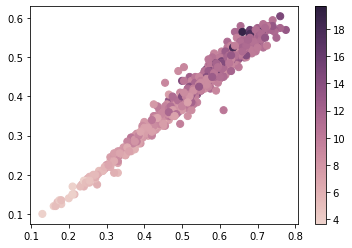

In [54]:
# A last thing to look at before starting to improve the model is the actual fit of your model. To understand what the model 
# has learned, you can visualize how your predictions have been made using Matplotlib:

import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()

points = ax.scatter(X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()


# In this code block, you use Seaborn to create a scatter plot of the first and second columns of X_test by subsetting the 
# arrays X_test[:,0] and X_test[:,1]. Remember from before that the first two columns are Length and Diameter. They are 
# strongly correlated, as you’ve seen in the correlations table.

# You use c to specify that the predicted values (test_preds) should be used as a colorbar. The argument s is used to specify 
# the size of the points in the scatter plot. You use cmap to specify the cubehelix_palette color map. To learn more about 
# plotting with Matplotlib, check out Python Plotting With Matplotlib.

# With the above code, you’ll get the following graph:

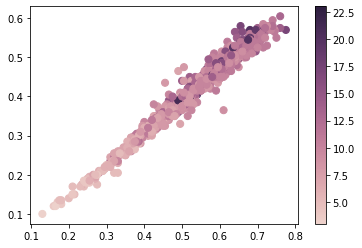

In [55]:
# On this graph, each point is an abalone from the test set, with its actual length and actual diameter on the X- and Y-axis, 
# respectively. The color of the point reflects the predicted age. You can see that the longer and larger an abalone is, the 
# higher its predicted age. This is logical, and it’s a positive sign. It means that your model is learning something that 
# seems correct.

# To confirm whether this trend exists in actual abalone data, you can do the same for the actual values by simply replacing 
# the variable that is used for c:

cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()

points = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

In [56]:
# This confirms that the trend your model is learning does indeed make sense.

# You could extract a visualization for each combination of the seven independent variables. For this tutorial, that would be 
# too long, but don’t hesitate to try it out. The only thing to change is the columns that are specified in the scatter.

# These visualizations are two-dimensional views of a seven-dimensional dataset. If you play around with them, it will give you
# a great understanding of what the model is learning and, maybe, what it’s not learning or is learning wrong.



# Tune and Optimize kNN in Python Using scikit-learn

In [57]:
# To find the best value for k, you’re going to use a tool called GridSearchCV. This is a tool that is often used for tuning 
# hyperparameters of machine learning models. In your case, it will help by automatically finding the best value of k for your 
# dataset.

# GridSearchCV is available in scikit-learn, and it has the benefit of being used in almost the exact same way as the 
# scikit-learn models:

from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

# Here, you use GridSearchCV to fit the model. In short, GridSearchCV repeatedly fits kNN regressors on a part of the data 
# and tests the performances on the remaining part of the data. Doing this repeatedly will yield a reliable estimate of the 
# predictive performance of each of the values for k. In this example, you test the values from 1 to 50.

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [58]:
# In the end, it will retain the best performing value of k, which you can access with .best_params_:

gridsearch.best_params_

# In this code, you print the parameters that have the lowest error score. With .best_params_, you can see that choosing 25 
# as value for k will yield the best predictive performance. 

{'n_neighbors': 25}

In [59]:
# Now that you know what the best value of k is, you can see how it affects your train and test performances:

train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
display(train_rmse)


test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
display(test_rmse)

# With this code, you fit the model on the training data and evaluate the test data. You can see that the training error is 
# worse than before, but the test error is better than before. This means that your model fits less closely to the training 
# data. Using GridSearchCV to find a value for k has reduced the problem of overfitting on the training data.

2.0801503860881105

2.1270043179131193

# Adding Weighted Average of Neighbors Based on Distance

In [60]:
# Using GridSearchCV, you reduced the test RMSE from 2.37 to 2.17. In this section, you’ll see how to improve the performances 
# even more.

# Below, you’ll test whether the performance of your model will be any better when predicting using a weighted average instead 
# of a regular average. This means that neighbors that are further away will less strongly influence the prediction.

# You can do this by setting the weights hyperparameter to the value of "distance". However, setting this weighted average 
# could have an impact on the optimal value of k. Therefore, you’ll again use GridSearchCV to tell you which type of averaging 
# you should use:

parameters = {"n_neighbors": range(1, 50),"weights": ["uniform", "distance"],}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})
gridsearch.best_params_ #{'n_neighbors': 25, 'weights': 'distance'}
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

# Here, you test whether it makes sense to use a different weighing using your GridSearchCV. Applying a weighted average rather
# than a regular average has reduced the prediction error from 2.17 to 2.1634. Although this isn’t a huge improvement, it’s 
# still better, which makes it worth it.

2.1095818025698887

# Further Improving on kNN in scikit-learn With Bagging

In [61]:
# As a third step for kNN tuning, you can use bagging. Bagging is an ensemble method, or a method that takes a relatively 
# straightforward machine learning model and fits a large number of those models with slight variations in each fit. Bagging 
# often uses decision trees, but kNN works perfectly as well.

# Ensemble methods are often more performant than single models. One model can be wrong from time to time, but the average of a 
# hundred models should be wrong less often. The errors of different individual models are likely to average each other out, 
# and the resulting prediction will be less variable.

# You can use scikit-learn to apply bagging to your kNN regression using the following steps. First, create the 
# KNeighborsRegressor with the best choices for k and weights that you got from GridSearchCV:

best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights)

In [67]:
# Then import the BaggingRegressor class from scikit-learn and create a new instance with 100 estimators using the bagged_knn 
# model:

from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100).fit(X_test, y_test)

In [68]:
# Now you can make a prediction and calculate the RMSE to see if it improved:

test_preds_grid = bagging_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

# The prediction error on the bagged kNN is 2.1616, which is slightly smaller than the previous error that you obtained. 
# It does take a little more time to execute, but for this example, that’s not problematic.

0.8393023940489213

In [69]:
# Comparison of the Four Models
# In three incremental steps, you’ve pushed the predictive performance of the algorithm. The following table shows a recap 
# of the different models and their performances:

# Model	Error
# Arbitrary k	2.37
# GridSearchCV for k	2.17
# GridSearchCV for k and weights	2.1634
# Bagging and GridSearchCV	0.8393023940489213
# In this table, you see the four models from simplest to most complex. The order of complexity corresponds with the order 
# of the error metrics. The model with a random k performed the worst, and the model with the bagging and GridSearchCV 
# performed the best.

# More improvement may be possible for abalone predictions. For instance, it would be possible to look for ways to wrangle 
# the data differently or to find other external data sources.